# Project 3 - Analyzing Autopsy Tissue for Downstream RNA Analysis

### **Scientific Question**: Does the postmortem interval have a negative impact on RNA integrity of normal human tissue?
Autopsy-sourced human tissue is collected from deceased people who consent to donating their body for research purposes. This is an efficient method in collecting large amounts of tissue of interest, in comparison to surgical biopsies and other similar procedures with living patients. Often, tissue cannot be collected from the deceased immediately, due to legal boundaries, so addressing the postmortem interval (PMI), or the time between death and before tissue processing, is almost always a factor to consider when using autopsy-sourced tissue. The knowledge gained from investigating this question can improve the optimization of biobanking, which can be vital to improving downstream research that utilizes these tissues.

RNA integrity, which decreases with RNA degradation and other factors that affect the tissue source, can be measured through the RNA Integrity Number (RIN). The RIN is assessed through an algorithm that analyzes potential gene expression during microarrays and real-time PCR experiments. Higher quality of RNA scales with a greater RIN, with a minimum score of 1 and a maximum of 10. This newer analysis of RNA is praised to be user-independent and thus less biased than typical measures of RNA integrity. 

RIN values were analyzed during their respective experiments and are reported in preliminary research articles found on PubMed, a large database that hosts and provides access to research publications, review articles, and more in the life sciences and biomedical sciences. 

### Scientific Hypothesis: If there is an increase postmortem interval (PMI), then there will be a inverse, linear change in RNA Integrity Number (RIN).
Raw PMI and RIN values were found in a research article on PubMed. The PMI and RIN values relevant to the proposed question were selected to undergo linear regression analysis, with PMI as the independent variable and RIN as the dependent variable. The Pearson correlation coefficient and the p-value of the linear regression model were calculated, and it was demonstrated in this experimental data that there is no significant inverse linear relationship between PMI and RIN.

To locate this data, I searched through the PubMed database using the query: "PMI AND RIN." PMI and RIN data found in this query were found to have already been manipulated, thus most raw data was not reported. PMI and RIN values for the bioinformatics analysis in this project were obtained from a data table (Table 4 in Fan et al. [2016]). The information from the data table was copied and pasted into Excel and downloaded as a CSV file. Non-numerical-only values were edited, so that unspecified values ("> 24") were removed and not included in data analysis. Asterisks were removed from any starred values to ensure float type conversion and were included in data analysis. The resulting CSV file ('Project 3 Data.csv') was imported into Jupyter Notebook and read into this code as a pandas DataFrame. 

## Part 1: Loading in Packages

### Description of Packages Used
* **NumPy**: Python package used to organize data into multidimensional and editable arrays and perform calculations on these arrays
* **scipy.stats**: Class, under SciPy, which contains functions to perform statistical analysis on data in NumPy arrays
* **matplotlib.pyplot**: Class, under matplotlib, which contains functions to visualize data from NumPy arrays into customizable scatter plots, line graphs, histograms, etc.
* **pandas**: Python package used to organize and shape data by including multidimensional data structures, such as Series and DataFrames, and operations to manipulate data in these structures

In [2]:
# Import all packages needed
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

## Part 2: Loading in Data and Performing Bioinformatics Analysis

Data from Table 4 in _Fan et al. (2016)_ were saved in a CSV file. This file was read as a pandas DataFrame, a data structure that includes the following information: 
* The first column represents each case's identification code
* The second column represents the PMI of each case
* The remaining columns represent the RIN of each specified tissue type
* NaN represents any values that are missing from the original dataset

In the code below, the CSV file was read in and the relevant data were converted into NumPy arrays. PMI and RIN arrays were indexed so that further analysis can only be performed on cases that had both a PMI and a RIN value, which prevents errors in regression analysis.

In [8]:
# Download data from research paper into csv file and import data table
# Set the first column as the case identification code instead of integers
table = pd.read_csv('Project 3 Data.csv', index_col=0)

# Print the DataFrame to see which columns are needed for analysis
print(table)

# Create single parameter function that converts specified columns of DataFrame table into a NumPy array
def df_to_array(col_name):
    '''Select the column of the DataFrame table and convert that column into a 1D row NumPy array'''
    # Place the specified DataFrame column into its own pandas Series, while converting all values into floats
    series = table[col_name].astype(float)
    
    # Convert the pandas series into a NumPy array in the form of a one-dimensional column
    column = series.to_numpy()
    
    # Rearrange the NumPy array in the form of a one-dimensional row
    row = column.T
    
    # Return the NumPy array
    return row

# Use the df_to_array function on each relevant column to convert them into NumPy arrays
# Only perform on the PMI column and the columns that contain RIN data on normal tissue (PMI, Normal Kidney RIN, Normal Liver RIN) 
x = df_to_array('PMI (hrs)')
y_NK = df_to_array('Normal Kidney')
y_NL = df_to_array('Normal Liver')

# Create single parameter function that indexes where it is possible to perform linear regression on PMI and RIN of each array
# To not result in errors when using function np.polyfit(), both PMI and RIN values must be finite (not NaN nor infinite)
def regression_index(y):
    '''Create a boolean NumPy array that indexes where values in arrays x and y are both finite (not NaN nor infinite)'''
    # Create array that reports True only when both values of that index in the PMI and RIN array are finite
    index = np.isfinite(x) & np.isfinite(y)
    return index
    
# Use regression_index function on each RIN NumPy array to create boolean array that indexes where it is possible
# to perform linear regression analysis using np.polyfit() without errors
NK_idx = regression_index(y_NK)
NL_idx = regression_index(y_NL)

         PMI (hrs)  Normal Kidney  Normal Liver  Primary Tumor  \
Case ID                                                          
A36            3.0            6.7           NaN            NaN   
A74            3.0            6.3           NaN            7.4   
A70            4.0            4.5           5.6            5.6   
RA15-10        4.3            3.6           NaN            7.6   
A68            5.0            3.9           7.5            2.3   
RA15-3        21.0            4.5           9.4            3.0   
A138          24.0            2.6           2.3            2.6   
RA15-9        24.0            6.2           8.7            8.0   
A73           28.0            NaN           2.1            2.2   
A165           NaN            2.1           2.1            8.4   

         Liver Metastasis  Lung Metastasis  
Case ID                                     
A36                   2.4              5.1  
A74                   6.0              9.3  
A70                   NaN  

## Part 3: Calculating the best-fit linear regression model, Pearson correlation coefficient, and p-value of the linear regression model
In part 3, linear regression analysis is conducted through the np.polyfit() function, which fits data from the PMI and RIN arrays into the best-fit linear regression model and returns the slope and y-intercept of the linear model. Linear regression analysis is further conducted through scipy.stats, which uses the same two data arrays and calculates the Pearson correlation coefficient (r) and p-value.
* **Pearson correlation coefficient (r)**: Value from -1 to +1 which measures the strength and direction of the association between PMI and RIN. This does not measure causation but rather correlation between the two variables.
* **p-value**: Value that measures the probability of the given data outcome occurring, under the assumption that there is no association between PMI and RIN. 

In [4]:
# Create function that fits the data into the best-fit linear regression model that outputs tuple of slope and y-int 
# while avoiding errors by only using indexes where there are PMI and RIN values
def linreg(tissuetype, y, index):
    '''Create a linear regression model using PMI and RIN as variables, while only taking in values that are indexed as finite'''
    # Fit the indexed PMI and RIN values into the best-fit linear regression line and output the slope m and y-intercept b
    # To perform linear regression, use a value of 1
    m,b = np.polyfit(x[index], y[index], 1)
    
    # Identify the tissue type and print out the equation of the linear regression model using m and b
    print('The equation of the best-fit linear regression model for '+ tissuetype + ' is: y = ' + str(m) + 'x + ' + str(b) + '.')
    
    # Store the slope and y-intercept as a tuple
    return m,b

# Create a function that calculates the Pearson correlation coefficient and p-value while avoiding errors
def corrcoef(tissuetype, y, index):
    '''Calculate the correlation coefficient and p-value of the linear regression model between PMI and RIN, while only taking in values that are indexed as finite'''
    # Calculate the Pearson correlation coefficient and p-value using the indexed PMI and RIN values
    r,p = stats.pearsonr(x[index], y[index])
    
    # Identify the tissue type and print out the calculated r and p-value
    print('The Pearson correlation coefficient of the best-fit linear model for '+ tissuetype + ' is: ' + str(r) + '.')
    print('The p-value of the best-fit linear model for '+ tissuetype + ' is: ' + str(p) + '.')
    
    # Store the correlation coefficient and the p-value as a tuple
    return r,p

# Use the linreg and corrcoef functions to find best-fit linear regression model, correlation coefficient, and p-value
# using PMI as the independent variable (x) and appropriate RIN array as dependent variable (y)
# Avoid NaN (missing) values by only using values along the index boolean array 
NK_linreg = linreg('normal kidney', y_NK, NK_idx)
NK_corrcoef = corrcoef('normal kidney', y_NK, NK_idx)
print('')
NL_linreg = linreg('normal liver', y_NL, NL_idx)
NL_corrcoef = corrcoef('normal liver', y_NL, NL_idx)

The equation of the best-fit linear regression model for normal kidney is: y = -0.036006631902468604x + 5.184923199623494.
The Pearson correlation coefficient of the best-fit linear model for normal kidney is: -0.24452465497636103.
The p-value of the best-fit linear model for normal kidney is: 0.5594643115695406.

The equation of the best-fit linear regression model for normal liver is: y = -0.0895476772616137x + 7.515342298288508.
The Pearson correlation coefficient of the best-fit linear model for normal liver is: -0.29533985470882673.
The p-value of the best-fit linear model for normal liver is: 0.5698708203497314.


## Part 4: Visualizing the Scatter Plot and Linear Regression Model
In Part 4, matplotlib.plt is used to create and display the scatter plot and linear regression model for both normal kidney and liver tissue. These plots only account for and display values that were indexed to have both a PMI and RIN value. The x-axis was labeled as the PMI and the y-axis was labeled as the RIN. The plot was titled to identify the tissue type. The linear regression model, which was calculated in Part 3, was plotted with a different color to differentiate from datapoints. 

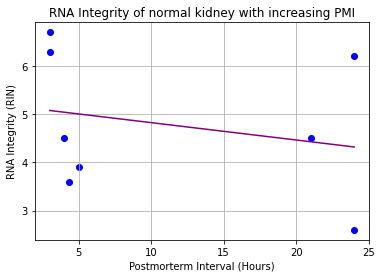

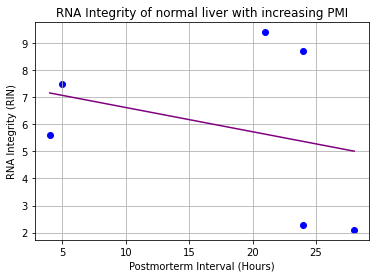

In [5]:
# Create a function that displays a labeled scatterplot and linear regression line 
# with PMI as the x-variable and RIN as the y-variable
def plot(tissuetype, index, y, m, b):
    '''Visualize a labeled scatterplot and linear regression line'''
    # Create the scatterplot using PMI as the independent variable on x-axis and RIN as the dependent variable on the y-axis
    # Only use values that are indexed in the boolean array
    plt.scatter(x[index], y[index], color='blue')
    
    # Label the x-axis as PMI
    plt.xlabel('Postmorterm Interval (Hours)')
    
    # Label the y-axis as RIN
    plt.ylabel('RNA Integrity (RIN)')
    
    # Label the title, including the tissue type
    plt.title('RNA Integrity of ' + tissuetype + ' with increasing PMI')
    
    # Show gridlines
    plt.grid(True)

    # Plot the best-fit linear regression model on top of the scatter plot
    # Set the color as purple to differentiate from points on scatter plot
    plt.plot(x[index], m*(x[index]) + b, color='purple')

    # Visualize the scatter plot and linear regression line
    plt.show()
    
# Use plot function on both of the indexed normal kidney and normal liver data
# m = XX_linreg[0] (in tuple)
# b = XX_linreg[1] (in tuple)
plot('normal kidney', NK_idx, y_NK, NK_linreg[0], NK_linreg[1])
plot('normal liver', NL_idx, y_NL, NL_linreg[0], NL_linreg[1])

## Part 5: Analysis and Interpretation of Data

* **Interpreting the Pearson correlation coefficient (r)**: The closer the coefficient is to |1|, the stronger the association between the variables. Similarly, the closer the value is to 0, the weaker the association between the variables. A positive r value suggests a positive association, while a negative r value suggests a negative association between PMI and RIN. In this code, only the direction of the association is being interpreted, as the strength is not relevant to the scientific hypothesis.

* **Interpreting the p-value**: An especially small p-value suggests that the data is particularly rare and thus significant. This is compared to an alpha value of 0.05, so any p-value less than 0.05 demonstrates statistical significance and can be used to support the alternative hypothesis, or the proposed hypothesis.

Both of these values are necessary to determine if the data supports the hypothesis that there is a negative relationship between PMI and RIN. To act as exidence to support this hypothesis, the data must achieve BOTH of the following conditions:
* r < 0: the Pearson correlation coefficient suggests a negative relationship between PMI and RIN
* p < 0.05: the p-value indicates that the data outcome is especially rare so that it is considered statistically significant

If the outcome does not achieve both of these conditions, then the data outcome does not support the hypothesis that there is a negative relationship between PMI and RIN.

In [6]:
# Create a function that interprets the Pearson correlation coefficient and p-value and their relevance to the hypothesis
def interpret(tissuetype, r, p):
    '''Interpret the correlation coefficient and p-value and how they can be interpreted in relation to the hypothesis'''
    # Interpret the correlation coefficient on the type of relationship (negative, independent, or positive) between PMI and RIN
    if r < 0 :
        relationship = 'a NEGATIVE'
    elif r == 0 :
        relationship = 'NO'
    else :
        relationship = 'a POSITIVE'
    
    # Print out the interpretation of the Pearson correlation coefficient
    print('The Pearson correlation coefficient of the best-fit linear regression model on ' + tissuetype + ' suggests ' + relationship + ' relationship between postmorterm interval and RNA integrity (r = ' + str(r) + ').')

    # Interpret if the relationship is statistically significant through comparing its p-value to an alpha value of 0.05
    if p < 0.05 :
        significance = ' '
    else :
        significance = ' NOT '
    
    # Print out the interpretation of the p-value
    print('This result for ' + tissuetype + ' is' + significance +'statistically significant because the p-value is' + significance + 'less than 0.05 (p-value = ' + str(p) + ').')

    # Interpret the correlation coefficient and p-value in relation to the hypothesis 
    # To support the hypothesis, the association must have a negative relationship (r < 0) AND must be statistically significant (p < 0.05)
    if r < 0 and p < 0.05:
        outcome = ' SUPPORTS '
    else:
        outcome = ' DOES NOT SUPPORT '

    # Print out the interpretation of r and p in relation to the hypothesis
    print('This outcome for ' + tissuetype + outcome + 'the proposed hypothesis that postmorterm interval has an inverse linear relationship with the RNA integrity of normal human tissue.')
    
# Use the interpret function on each relationship by using the calculated r and p-value from the corrcoef function
# r = XX_corrcoef[0]
# p = XX_corrcoef[1]
interpret('normal kidney', NK_corrcoef[0], NK_corrcoef[1])
print('')
interpret('normal liver', NL_corrcoef[0], NL_corrcoef[1])

The Pearson correlation coefficient of the best-fit linear regression model on normal kidney suggests a NEGATIVE relationship between postmorterm interval and RNA integrity (r = -0.24452465497636103).
This result for normal kidney is NOT statistically significant because the p-value is NOT less than 0.05 (p-value = 0.5594643115695406).
This outcome for normal kidney DOES NOT SUPPORT the proposed hypothesis that postmorterm interval has an inverse linear relationship with the RNA integrity of normal human tissue.

The Pearson correlation coefficient of the best-fit linear regression model on normal liver suggests a NEGATIVE relationship between postmorterm interval and RNA integrity (r = -0.29533985470882673).
This result for normal liver is NOT statistically significant because the p-value is NOT less than 0.05 (p-value = 0.5698708203497314).
This outcome for normal liver DOES NOT SUPPORT the proposed hypothesis that postmorterm interval has an inverse linear relationship with the RNA 

## Part 6: Final Analysis and Conclusion
Analyses on both normal kidney and liver suggest a negative relationship between PMI and RNA integrity, however neither demonstrated statistical significance. As such, these datasets do NOT support the hypothesis that there is a inverse linear relationship between postmortem interval and RNA integrity in normal human tissue. Thus, my hypothesis was incorrect.

Since the analysis was performed on small datasets, the analysis in this project may not be entirely true to the actual relationship between postmortem interval and RNA integrity. More available raw data pertaining to postmortem intervals and RNA integrity numbers and further analysis with the same approach may lead to better insights on this topic. 

Other numerical characteristics of postmortem tissue, such as pH, BMI of the deceased, and age at death, can also be used in the code presented in this project to identify potential relationships with RNA integrity. Knowledge of these relationships can improve biobanking approaches to autopsy-sourced normal human tissue and improve downstream RNA analysis.